In [13]:
cd /content/drive/MyDrive/Colab Notebooks (1)

/content/drive/MyDrive/Colab Notebooks (1)


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
ls

3scene/


In [15]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [16]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [17]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 #bisa pasang preprocessing disini jika mau, seperti filterring, dll
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [18]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [19]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [20]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [21]:
print(np.array(data).shape)

(948, 64, 64, 3)


In [22]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [70]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(256, activation="relu"),
        Dense(128, activation="relu"),
        Dropout(0.4),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dropout(0.4),
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [71]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               3145984   
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)               

In [72]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
23/23 [==============================] - 1s 34ms/step - loss: 1.7159 - accuracy: 0.3331 - val_loss: 1.2190 - val_accuracy: 0.3038
Epoch 2/50
23/23 [==============================] - 1s 25ms/step - loss: 1.1942 - accuracy: 0.4185 - val_loss: 1.0928 - val_accuracy: 0.4304
Epoch 3/50
23/23 [==============================] - 1s 25ms/step - loss: 1.1124 - accuracy: 0.3778 - val_loss: 1.0615 - val_accuracy: 0.4641
Epoch 4/50
23/23 [==============================] - 1s 25ms/step - loss: 1.1223 - accuracy: 0.3562 - val_loss: 1.0895 - val_accuracy: 0.3376
Epoch 5/50
23/23 [==============================] - 1s 25ms/step - loss: 1.1263 - accuracy: 0.3916 - val_loss: 1.0890 - val_accuracy: 0.3502
Epoch 6/50
23/23 [==============================] - 1s 25ms/step - loss: 1.0797 - accuracy: 0.3970 - val_loss: 1.0426 - val_accuracy: 0.4810
Epoch 7/50
23/23 [==============================] - 1s 25ms/step - loss: 1.0661 - accuracy: 0.4368 - val_loss: 0.9607 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


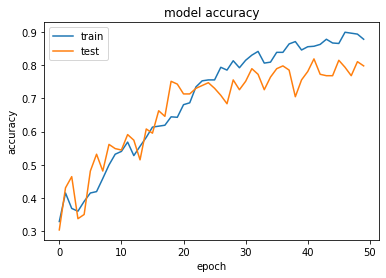

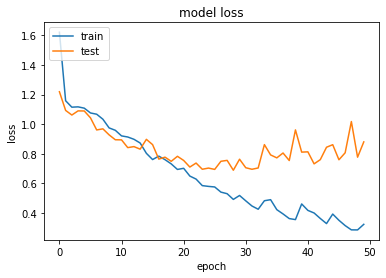

In [73]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.79      0.80      0.80       100
      forest       0.87      0.81      0.83        72
     highway       0.74      0.78      0.76        65

    accuracy                           0.80       237
   macro avg       0.80      0.80      0.80       237
weighted avg       0.80      0.80      0.80       237



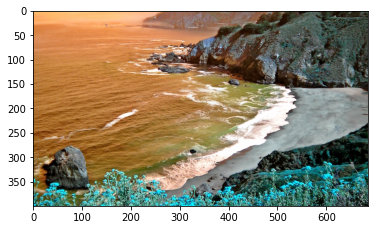

In [84]:
import cv2
import matplotlib.pyplot as plt

gambar = 'test_gambar_coast.jpg'
image = cv2.imread(gambar)
plt.imshow(image)
plt.show()

In [85]:
image_test=Image.open(gambar)
image_test=np.array(image_test.resize((64,64))) / 255.0
image_test.shape

(64, 64, 3)

In [86]:
image_test=np.expand_dims(image_test, axis=0)
image_test.shape

(1, 64, 64, 3)

In [87]:
predict = model.predict(image_test)

In [88]:
print(predict)

[[8.92575741e-01 2.55166786e-04 1.07169084e-01]]


In [89]:
print(lb.classes_[predict.argmax(axis=1)])

['coast']
